# Session Analytics - Rohan Bungre

### Importing required libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('seaborn')

### Loading Session Data

In [2]:
sessions = pd.read_csv("../data/raw/sessions.csv")
sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [3]:
print("Session Dataframe Shape - ", sessions.shape)
print("Number of Unique User Ids - ", len(sessions.user_id.unique()))

Session Dataframe Shape -  (10567737, 6)
Number of Unique User Ids -  135484


### User Session Count

In [4]:
df_session_counts = sessions.groupby(['user_id']).user_id.count().reset_index(name = 'session_count')
df_session_counts.head()

,user_id,session_count
0,00023iyk9l,40
1,0010k6l0om,63
2,001wyh0pz8,90
3,0028jgx1x1,31
4,002qnbzfs5,789


In [5]:
df_session_counts.session_count.describe()

count    135483.000000
mean         77.745850
std         112.563746
min           1.000000
25%          16.000000
50%          41.000000
75%          95.000000
max        2722.000000
Name: session_count, dtype: float64

### Seconds Elapsed Per Session

In [6]:
df_secs = sessions.groupby(['user_id']).secs_elapsed.sum().reset_index()
df_secs.columns = ['user_id', 'secs_elapsed']
df_secs.head()

,user_id,secs_elapsed
0,00023iyk9l,867896.0
1,0010k6l0om,586543.0
2,001wyh0pz8,282965.0
3,0028jgx1x1,297010.0
4,002qnbzfs5,6487080.0


In [7]:
df_secs.describe()

,secs_elapsed
count,1.354830e+05
mean,1.489732e+06
std,1.892923e+06
min,0.000000e+00
25%,2.605980e+05
50%,8.502710e+05
75%,2.000422e+06
max,3.822136e+07


### Session User Actions

In [8]:
sessions.action.value_counts()

show                         2768278
index                         843699
search_results                725226
personalize                   706824
search                        536057
                              ...   
deactivated                        1
reactivate                         1
set_minimum_payout_amount          1
deactivate                         1
events                             1
Name: action, Length: 359, dtype: int64

<AxesSubplot:xlabel='Action', ylabel='Percentage'>

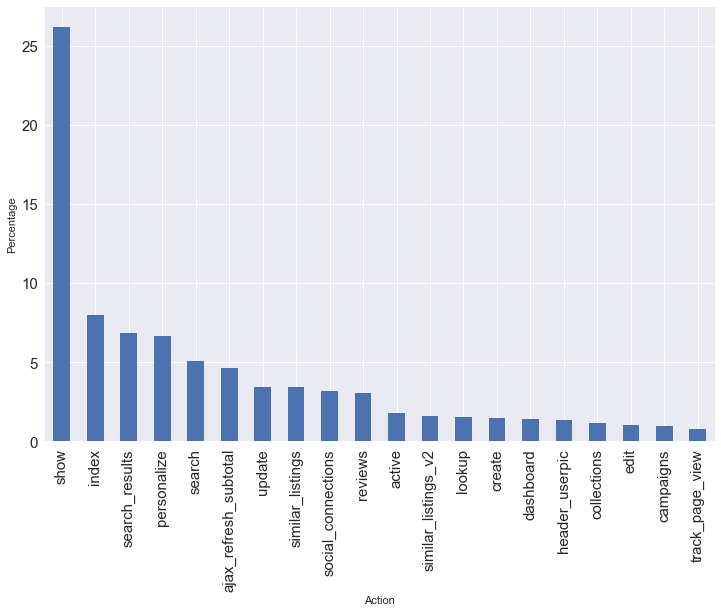

In [9]:
data = sessions.action.value_counts(dropna = False)[0:20] / sessions.shape[0] * 100
plt.figure(figsize = (12, 8))
plt.xlabel('Action')
plt.ylabel('Percentage')
data.plot(kind='bar', fontsize = 15)

In [10]:
action_counts = sessions.groupby(['user_id', 'action'])['secs_elapsed'].agg(['count'])
action_counts = action_counts.groupby(['user_id', 'action']).sum()
display(action_counts)

count
user_id    action                      
00023iyk9l ajax_refresh_subtotal      2
           callback                   0
           confirm_email              1
           dashboard                  4
           header_userpic             2
...                                 ...
zzzlylp57e personalize                6
           requested                  5
           search_results            10
           show                      14
           similar_listings           9

[1732721 rows x 1 columns]

In [11]:
action_counts = action_counts.reset_index().pivot(index='user_id', columns='action', values=['count']).fillna(0)
action_counts.head()

count                                                 \
action        10   11   12   15 about_us accept_decline account   
user_id                                                           
00023iyk9l   0.0  0.0  0.0  0.0      0.0            0.0     0.0   
0010k6l0om   0.0  0.0  0.0  0.0      0.0            0.0     0.0   
001wyh0pz8   0.0  0.0  0.0  0.0      0.0            0.0     0.0   
0028jgx1x1   0.0  0.0  0.0  0.0      0.0            0.0     0.0   
002qnbzfs5   9.0  0.0  0.0  0.0      0.0            0.0     0.0   

                                                                 \
action     acculynk_bin_check_failed acculynk_bin_check_success   
user_id                                                           
00023iyk9l                       0.0                        0.0   
0010k6l0om                       0.0                        0.0   
001wyh0pz8                       0.0                        0.0   
0028jgx1x1                       0.0                        0.0   
002qnbzfs5                       0.0                        0.0   

                                  ...                            \
action     acculynk_load_pin_pad  ... view views views_campaign   
user_id                           ...                             
00023iyk9l                   0.0  ...  0.0   0.0            0.0   
0010k6l0om                   0.0  ...  0.0   0.0            0.0   
001wyh0pz8                   0.0  ...  0.0   0.0            0.0   
0028jgx1x1                   0.0  ...  0.0   0.0            0.0   
002qnbzfs5                   0.0  ...  0.0   0.0            0.0   

                                                                            \
action     views_campaign_rules webcam_upload weibo_signup_referral_finish   
user_id                                                                      
00023iyk9l                  0.0           0.0                          0.0   
0010k6l0om                  0.0           0.0                          0.0   
001wyh0pz8                  0.0           0.0                          0.0   
0028jgx1x1                  0.0           0.0                          0.0   
002qnbzfs5                  0.0           0.0                          0.0   

                                                        
action     why_host widget wishlists zendesk_login_jwt  
user_id                                                 
00023iyk9l      0.0    0.0       0.0               0.0  
0010k6l0om      0.0    0.0       0.0               0.0  
001wyh0pz8      0.0    0.0       0.0               0.0  
0028jgx1x1      0.0    0.0       0.0               0.0  
002qnbzfs5      0.0    0.0       0.0               0.0  

[5 rows x 359 columns]

### Session User Actions Type

In [12]:
sessions.action_type.value_counts()

view                3560902
data                2103770
click               1996183
-unknown-           1031170
submit               623357
message_post          87103
partner_callback      19132
booking_request       18773
modify                 1139
booking_response          4
Name: action_type, dtype: int64

<AxesSubplot:xlabel='Action', ylabel='Percentage'>

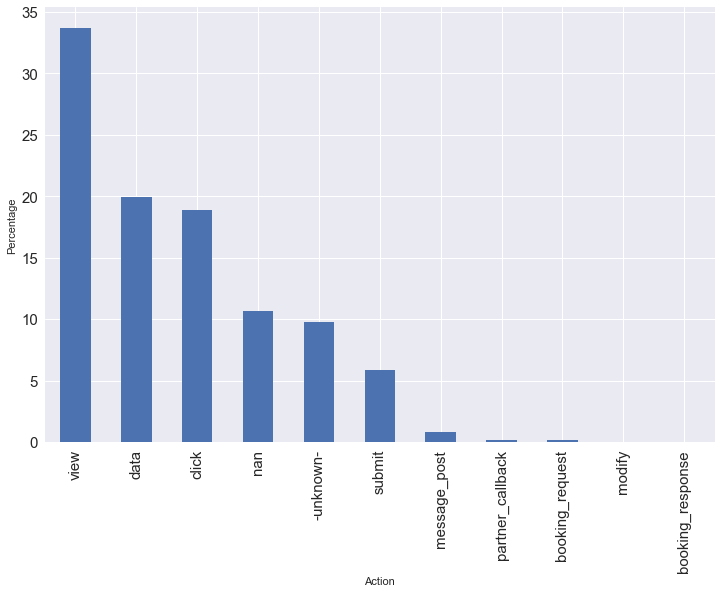

In [13]:
data = sessions.action_type.value_counts(dropna = False) / sessions.shape[0] * 100
plt.figure(figsize = (12, 8))
plt.xlabel('Action')
plt.ylabel('Percentage')
data.plot(kind='bar', fontsize = 15)

In [14]:
action_type_counts = sessions.groupby(['user_id', 'action_type'])['secs_elapsed'].agg(['count'])
action_type_counts = action_type_counts.groupby(['user_id', 'action_type']).sum()
display(action_type_counts)

count
user_id    action_type            
00023iyk9l booking_request       1
           click                 4
           data                  9
           message_post          1
           partner_callback      0
...                            ...
zzzlylp57e click                22
           data                 17
           message_post          1
           submit                2
           view                 20

[671364 rows x 1 columns]

In [15]:
action_type_counts = action_type_counts.reset_index().pivot(index='user_id', columns='action_type', values=['count']).fillna(0)
action_type_counts.head()

count                                                 \
action_type -unknown- booking_request booking_response  click   data   
user_id                                                                
00023iyk9l        0.0             1.0              0.0    4.0    9.0   
0010k6l0om        5.0             0.0              0.0   16.0    9.0   
001wyh0pz8        6.0             0.0              0.0   66.0    2.0   
0028jgx1x1        1.0             0.0              0.0    9.0    5.0   
002qnbzfs5      184.0             1.0              0.0  140.0  140.0   

                                                                
action_type message_post modify partner_callback submit   view  
user_id                                                         
00023iyk9l           1.0    0.0              0.0    0.0   21.0  
0010k6l0om           0.0    0.0              0.0    0.0   17.0  
001wyh0pz8           0.0    0.0              0.0    2.0    8.0  
0028jgx1x1           0.0    0.0              0.0    0.0   15.0  
002qnbzfs5          16.0    0.0              0.0   15.0  216.0

### Session User Actions Detail

In [16]:
sessions.action_detail.value_counts()

view_search_results         1776885
p3                          1376550
-unknown-                   1031141
wishlist_content_update      706824
user_profile                 656839
                             ...   
special_offer_field               3
host_respond_page                 2
host_refund_guest                 2
tos_2014                          2
host_standard_suspension          1
Name: action_detail, Length: 155, dtype: int64

<AxesSubplot:xlabel='Action', ylabel='Percentage'>

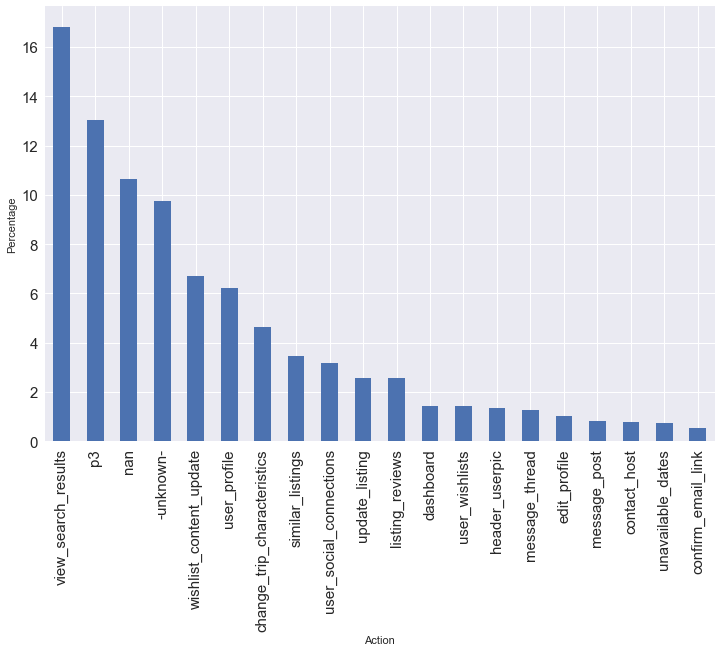

In [17]:
data = sessions.action_detail.value_counts(dropna = False)[0:20] / sessions.shape[0] * 100
plt.figure(figsize = (12, 8))
plt.xlabel('Action')
plt.ylabel('Percentage')
data.plot(kind='bar', fontsize = 15)

In [18]:
action_detail_counts = sessions.groupby(['user_id', 'action_detail'])['secs_elapsed'].agg(['count'])
action_detail_counts = action_detail_counts.groupby(['user_id', 'action_detail']).sum()
display(action_detail_counts)

count
user_id    action_detail                     
00023iyk9l change_trip_characteristics      2
           confirm_email_link               1
           dashboard                        4
           header_userpic                   2
           message_post                     1
...                                       ...
zzzlylp57e pending                          1
           post_checkout_action             1
           similar_listings                 9
           view_search_results             12
           wishlist_content_update          6

[1508994 rows x 1 columns]

In [19]:
action_detail_counts = action_detail_counts.reset_index().pivot(index='user_id', columns='action_detail', values=['count']).fillna(0)
action_detail_counts.head()

count                                                        \
action_detail -unknown- account_notification_settings account_payment_methods   
user_id                                                                         
00023iyk9l          0.0                           0.0                     0.0   
0010k6l0om          5.0                           0.0                     0.0   
001wyh0pz8          6.0                           0.0                     0.0   
0028jgx1x1          1.0                           0.0                     0.0   
002qnbzfs5        184.0                           0.0                     0.0   

                                                                   \
action_detail account_payout_preferences account_privacy_settings   
user_id                                                             
00023iyk9l                           0.0                      0.0   
0010k6l0om                           0.0                      0.0   
001wyh0pz8                           0.0                      0.0   
0028jgx1x1                           0.0                      0.0   
002qnbzfs5                           0.0                      0.0   

                                                           \
action_detail account_transaction_history admin_templates   
user_id                                                     
00023iyk9l                            0.0             0.0   
0010k6l0om                            0.0             0.0   
001wyh0pz8                            0.0             0.0   
0028jgx1x1                            0.0             0.0   
002qnbzfs5                            0.0             0.0   

                                                                          ...  \
action_detail airbnb_picks_wishlists alteration_field alteration_request  ...   
user_id                                                                   ...   
00023iyk9l                       0.0              0.0                0.0  ...   
0010k6l0om                       0.0              0.0                0.0  ...   
001wyh0pz8                       0.0              0.0                0.0  ...   
0028jgx1x1                       0.0              0.0                0.0  ...   
002qnbzfs5                       0.0              0.0                0.0  ...   

                                                                         \
action_detail view_resolutions view_search_results view_security_checks   
user_id                                                                   
00023iyk9l                 0.0                 5.0                  0.0   
0010k6l0om                 0.0                10.0                  0.0   
001wyh0pz8                 0.0                66.0                  0.0   
0028jgx1x1                 0.0                 9.0                  0.0   
002qnbzfs5                 0.0               125.0                  0.0   

                                                                     \
action_detail view_user_real_names wishlist wishlist_content_update   
user_id                                                               
00023iyk9l                     0.0      0.0                     4.0   
0010k6l0om                     0.0      0.0                     8.0   
001wyh0pz8                     0.0      0.0                     0.0   
0028jgx1x1                     0.0      0.0                     0.0   
002qnbzfs5                     0.0      0.0                     0.0   

                                                                        
action_detail wishlist_note your_listings your_reservations your_trips  
user_id                                                                 
00023iyk9l              0.0           0.0               0.0        2.0  
0010k6l0om              0.0           0.0               0.0        0.0  
001wyh0pz8              0.0           0.0               0.0        0.0  
0028jgx1x1              0.0           0.0               0.0        0.0